In [102]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_excel("dataset.xlsx")

In [3]:
data=data.replace('?',np.nan)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(90), int64(45), object(1)
memory usage: 6.4+ MB


In [5]:
data1=data.copy()
data1=data1.dropna()
data1.isna().sum().sum()


0

In [6]:
data1['ind_109'].unique()

array(['GREEN', 'RED'], dtype=object)

In [7]:
dummyVariable=pd.get_dummies(data1['ind_109'])
data1=data1.drop(['ind_109'],axis=1)
dummyVariable


,GREEN,RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6162,0,1
6163,0,1
6164,1,0
6165,1,0


In [8]:
targets=data1[['90_target','50_target','20_target']]
data1=data1.drop(['90_target','50_target','20_target'],axis=1)

In [9]:
data1=pd.concat([data1,dummyVariable['GREEN']],axis=1)

In [10]:
data1

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,GREEN
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,-152.0,-353.0,1.000000,0.498547,0.701906,1
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,-158.0,-359.0,1.000000,0.537088,0.690833,1
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,-160.0,-362.0,1.000000,0.615169,0.693040,1
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,-166.0,-367.0,1.000000,0.661517,0.673418,1
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,-186.0,-388.0,1.000000,0.747204,0.700522,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,0.004633,14.7,-28.2,-40,-11.0,-270.0,0.270270,0.840000,0.600846,0
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,0.008511,14.3,-28.6,-41,-12.0,-271.0,0.000000,0.737470,0.527673,0
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,0.008848,5.7,-37.2,-49,-21.0,-280.0,0.769231,0.632107,0.551759,1
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,0.008940,1.4,-48.9,-61,-33.0,-292.0,1.000000,0.733010,0.591584,1


In [11]:
targets

,90_target,50_target,20_target
0,36.997753,35.625252,15.135802
1,37.016198,35.643013,15.143348
2,-37.024805,35.651301,15.146870
3,-37.040483,0.000000,15.153283
4,-37.103503,-35.727079,-15.179065
...,...,...,...
6162,-35.867088,-34.536532,14.673247
6163,-35.868318,-34.537716,14.673750
6164,-35.894755,-34.563173,-14.684566
6165,-35.930723,-34.597806,-14.699280


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data1,targets['90_target'],test_size=0.25,random_state=42)

In [13]:
rf_model = RandomForestRegressor().fit(X_train, y_train)

In [14]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

15.206188739485615

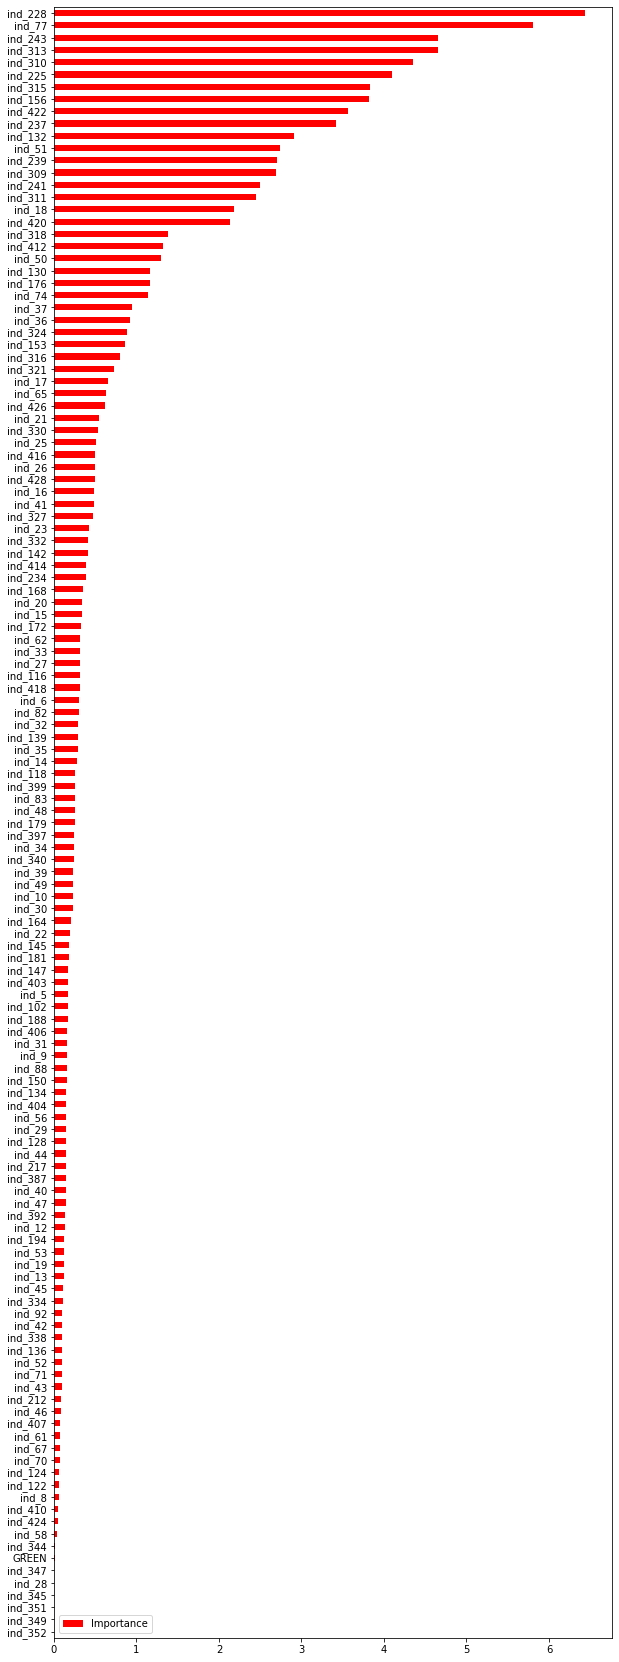

In [15]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind ="barh", color = "r",figsize=(10,30))



In [16]:
Importance[Importance["Importance"]>2].index

Index(['ind_18', 'ind_51', 'ind_77', 'ind_132', 'ind_156', 'ind_225',
       'ind_228', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309',
       'ind_310', 'ind_311', 'ind_313', 'ind_315', 'ind_420', 'ind_422'],
      dtype='object')

In [12]:
X=data1[['ind_18', 'ind_51', 'ind_77', 'ind_132', 'ind_156', 'ind_225','ind_228', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309','ind_310', 'ind_313', 'ind_315', 'ind_420', 'ind_422']]
X

,ind_18,ind_51,ind_77,ind_132,ind_156,ind_225,ind_228,ind_237,ind_239,ind_241,ind_243,ind_309,ind_310,ind_313,ind_315,ind_420,ind_422
0,9.1100,-93,8,-125,58.888561,0.039883,1.200860,10.000000,0.000217,99.736250,1.200346,-0.000013,-1.524694,1.179209,-0.756946,-152.0,-353.0
1,9.2225,-96,8,-130,59.182324,0.039863,1.200700,9.090909,0.000217,99.668519,1.200129,-0.000013,-1.523934,1.179223,-0.756569,-158.0,-359.0
2,9.3125,-95,8,-132,59.318698,0.039854,1.200540,8.333333,0.000217,99.627319,1.199911,-0.000013,-1.523580,1.179236,-0.756393,-160.0,-362.0
3,9.4150,-97,8,-136,59.565979,0.039837,1.200380,7.692308,0.000217,99.567128,1.199694,-0.000013,-1.522935,1.179249,-0.756073,-166.0,-367.0
4,9.8925,-115,8,-156,60.535098,0.039769,1.200220,7.142857,0.000217,99.380024,1.199477,-0.000013,-1.520349,1.179263,-0.754789,-186.0,-388.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,16.2175,-56,15,-38,51.648609,0.000948,1.193459,17.437186,0.000013,100.965196,1.178001,-0.000008,-0.163704,1.153205,-0.003428,-11.0,-270.0
6163,16.1175,-56,14,-39,51.664697,0.000948,1.193456,17.428428,0.000013,100.960612,1.177988,-0.000008,-0.163698,1.153213,-0.003428,-12.0,-271.0
6164,16.3125,-65,14,-47,52.010263,0.000948,1.193452,17.419679,0.000013,100.885130,1.177975,-0.000008,-0.163578,1.153221,-0.003426,-21.0,-280.0
6165,16.4200,-76,14,-59,52.474844,0.000947,1.193448,17.410938,0.000013,100.783022,1.177962,-0.000008,-0.163414,1.153230,-0.003422,-33.0,-292.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,targets['90_target'],test_size=0.25,random_state=42)
rf_model = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

13.526411568284662

In [19]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [5,10,15],
            'n_estimators' : [100,150,300]}

In [20]:
rf_model = RandomForestRegressor()
rf_cv= GridSearchCV(rf_model,rf_params,cv = 10,n_jobs = -1,verbose=2)               

In [21]:
rf_cv.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 13.6min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [5, 10, 15],
                         'n_estimators': [100, 150, 300]},
             verbose=2)

In [30]:
rf_cv.best_params_

{'max_depth': 9, 'max_features': 15, 'n_estimators': 150}

In [39]:
rf_tuned = RandomForestRegressor(max_depth  = 20, max_features = 6, n_estimators =500)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

12.888192108399316

## CART


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,targets['90_target'],test_size=0.25,random_state=42)
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred =cart_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_pred, y_pred))

17.9150237329754

In [59]:
?cart_model

In [14]:
cart_params = {"min_samples_split": [2,10,20,50,100],"max_leaf_nodes": range(2,10),"criterion" : ["mse", "mae"]}
cart_cv= GridSearchCV(cart_model, cart_params, cv = 10,n_jobs=-1,verbose=2)
cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 653 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  5.5min finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_leaf_nodes': range(2, 10),
                         'min_samples_split': [2, 10, 20, 50, 100]},
             verbose=2)

In [16]:
cart_cv.best_params_

{'criterion': 'mse', 'max_leaf_nodes': 9, 'min_samples_split': 2}

In [61]:
cart_tuned = DecisionTreeRegressor(min_samples_split = 2,criterion="mse",max_depth = 50,splitter='best')
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

18.17491694074689

In [64]:
###Feature seçilmemiş orjinal dataset

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data1,targets['90_target'],test_size=0.25,random_state=42)

In [63]:
cart_tuned = DecisionTreeRegressor()
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

22.421584649757378

## NN

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,targets['90_target'],test_size=0.25,random_state=42)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [155]:
mlp_model = MLPRegressor()
mlp_model.fit(X_train_scaled, y_train)

MLPRegressor()

In [97]:
?mlp_model

In [68]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

29.661459484482872

In [106]:
mlp_model = MLPRegressor()
mlp_params = {'alpha': [0.1, 0.01,0.02],
             'hidden_layer_sizes': [(20,50),(50,10),(100,50)],
             'activation': ['relu','logistic'],'solver' : ['sgd', 'adam']}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10,n_jobs=-1,verbose=2)

In [107]:
X_train_scaled

array([[ 0.5046814 , -1.26069699,  1.26806315, ..., -0.69833331,
        -0.44321417, -0.84979434],
       [-0.62744899,  0.23124292, -0.83763792, ...,  0.4746996 ,
        -0.24039998,  0.34485397],
       [-0.48975745, -0.40283154,  1.18032561, ..., -1.26418648,
        -0.13899288,  0.16044517],
       ...,
       [-0.82251199,  0.95856363, -0.74990037, ...,  0.81685926,
         0.10607427,  0.6735827 ],
       [-0.0384352 , -0.1603913 , -0.92537546, ...,  0.81685926,
         0.81592393,  0.49719167],
       [ 0.16140876, -0.45877928,  1.09258806, ...,  0.80714845,
        -1.49108749, -0.52908339]])

In [108]:
mlp_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 13.1min finished


GridSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02],
                         'hidden_layer_sizes': [(20, 50), (50, 10), (100, 50)],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [148]:
mlp_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (100, 50),
 'solver': 'sgd'}

In [178]:
mlp_tuned = MLPRegressor(activation='relu',alpha=0.01,hidden_layer_sizes=(100,200),solver='sgd')

In [179]:
mlp_tuned.fit(X_train_scaled, y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

17.88706713579722

In [135]:
?mlp_tuned